In [1]:
import csv
import tempfile
import shutil
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re
from pydriller import Repository
from github import Github
import os

import time

In [2]:
def save_info(project, str, val,file_name):
    new_row = [project,str, val]
    with open(file_name, 'a', newline='') as file:
      writer = csv.writer(file)
      writer.writerow(new_row) 

In [3]:
import time

def Puppet_process(repo_url, project, Technical_info_file_name):
        IaCFiles = set()
        OtherFiles = set()
        Files_Commits = []
        Files_Suffix = []
    

        for commit in Repository(repo_url).traverse_commits():
            time.sleep(1)
            Files_Suffix = []
            try:
                if len(commit.modified_files) == 0:
                    # Commit is empty and has no files
                    # Handle the case when the commit is empty and has no files
                    print("Empty commit with no files:", commit.hash)
                else:
                    Files_Suffix.append(commit.hash)

                for file in commit.modified_files:
                    if file.new_path is not None:
                        
                        patternTest = r'\b(test|tests)\b'
                        patternDoc = r'\b(doc)\b'
                        patternSpec = r'\b(spec)\b'


                        if (
                            ".pp" in file.filename and
                            not (re.search(patternTest, file.new_path))and
                            not (re.search(patternSpec, file.new_path) )and
                            not (re.search(patternDoc, file.new_path))
                        ):  
                            print(file.filename)
                            file_name = project + "/" + file.new_path + "_(IaC)_"
                            if file.new_path not in IaCFiles:
                                IaCFiles.add(file_name)
                            Files_Suffix.append(file_name)
                            print(file_name)
                            
                        elif (
                            '.gif' not in file.filename and
                            'README' not in file.filename and
                            'TODO' not in file.filename and
                            'CHANGELOG' not in file.filename and
                            'QUESTIONS' not in file.filename and
                            '.jpg' not in file.filename and
                            '.jpeg' not in file.filename and
                            '.png' not in file.filename and
                            '.svg' not in file.filename and
                            '.wmf' not in file.filename and
                            '.plist' not in file.filename and
                            '.cnf' not in file.filename and
                            '.in' not in file.filename and
                            '.5' not in file.filename and
                            '.crt' not in file.filename and
                            '.sample' not in file.filename and
                            '.gitkeep' not in file.filename and
                            '.html' not in file.filename and
                            '.gemspec' not in file.filename and
                            '.css' not in file.filename and
                            '.pack' not in file.filename and
                            '.idx' not in file.filename and
                            '.key' not in file.filename and
                            '.filters' not in file.filename and
                            '.d' not in file.filename and
                            '.suse' not in file.filename and
                            '.expected' not in file.filename and
                            '.toml' not in file.filename and
                            '.service' not in file.filename and
                            '.graffle' not in file.filename and
                            '.po' not in file.filename and
                            '.keystone' not in file.filename and
                            '.gitreview' not in file.filename and
                            '.fixtures.yml' not in file.filename and
                            'Modulefile' not in file.filename and
                            '.gitignore' not in file.filename and
                            'Gemfile' not in file.filename and
                            'Rakefile' not in file.filename and
                            '.md' not in file.filename and
                            'LICENSE' not in file.filename and
                            '.rst' not in file.filename and
                            'AUTHORS' not in file.filename and
                            '.txt' not in file.filename
                        ):
                            print(file.filename)
                            file_name = project + "/" + file.new_path + "_(Other)_"
                            if file.new_path not in OtherFiles:
                                OtherFiles.add(file_name)
                            Files_Suffix.append(file_name)
                            print(file_name)



                    else: 
                        patternTest = r'\b(test|tests)\b'
                        patternDoc = r'\b(doc)\b'
                        patternSpec = r'\b(spec)\b'


                        if (
                            ".pp" in file.filename and
                            not (re.search(patternTest, file.old_path))and
                            not (re.search(patternSpec, file.old_path) )and
                            not (re.search(patternDoc, file.old_path))
                        ):  
                            print(file.filename)
                            file_name = project + "/" + file.old_path + "_(IaC)_"
                            if file.old_path not in IaCFiles:
                                IaCFiles.add(file_name)
                            Files_Suffix.append(file_name)
                            print(file_name)
                            
                        elif (
                            '.gif' not in file.filename and
                            'README' not in file.filename and
                            'TODO' not in file.filename and
                            'CHANGELOG' not in file.filename and
                            'QUESTIONS' not in file.filename and
                            '.jpg' not in file.filename and
                            '.jpeg' not in file.filename and
                            '.png' not in file.filename and
                            '.svg' not in file.filename and
                            '.wmf' not in file.filename and
                            '.plist' not in file.filename and
                            '.cnf' not in file.filename and
                            '.in' not in file.filename and
                            '.5' not in file.filename and
                            '.crt' not in file.filename and
                            '.sample' not in file.filename and
                            '.gitkeep' not in file.filename and
                            '.html' not in file.filename and
                            '.gemspec' not in file.filename and
                            '.css' not in file.filename and
                            '.pack' not in file.filename and
                            '.idx' not in file.filename and
                            '.key' not in file.filename and
                            '.filters' not in file.filename and
                            '.d' not in file.filename and
                            '.suse' not in file.filename and
                            '.expected' not in file.filename and
                            '.toml' not in file.filename and
                            '.service' not in file.filename and
                            '.graffle' not in file.filename and
                            '.po' not in file.filename and
                            '.keystone' not in file.filename and
                            '.gitreview' not in file.filename and
                            '.fixtures.yml' not in file.filename and
                            'Modulefile' not in file.filename and
                            '.gitignore' not in file.filename and
                            'Gemfile' not in file.filename and
                            'Rakefile' not in file.filename and
                            '.md' not in file.filename and
                            'LICENSE' not in file.filename and
                            '.rst' not in file.filename and
                            'AUTHORS' not in file.filename and
                            '.txt' not in file.filename
                        ):
                            print(file.filename)
                            file_name = project + "/" + file.old_path + "_(Other)_"
                            if file.old_path not in OtherFiles:
                                OtherFiles.add(file_name)
                            Files_Suffix.append(file_name)
                            print(file_name)        

                if len(Files_Suffix) != 0:
                    Files_Commits.append(Files_Suffix)

            except ValueError as e:
                print(f"Error processing commit {commit.hash}: {str(e)}")
                continue        

        save_info(project, 'Number of puppet files in all commits history:', len(IaCFiles), Technical_info_file_name)
        save_info(project, 'Number of other files in all commits history:', len(OtherFiles), Technical_info_file_name)

    
        return Files_Commits, IaCFiles


In [4]:
import re
import time
from pydriller import Repository

def Ansible_process(repo_url, project, Technical_info_file_name):
        IaCFiles = set()
        OtherFiles = set()
        Files_Commits = []
        Files_Suffix = []

    
        for commit in Repository(repo_url).traverse_commits():
            time.sleep(1)
            Files_Suffix = []
            try:
                if  len(commit.modified_files) == 0:
                    # Commit is empty and has no files
                    # Handle the case when the commit is empty and has no files
                    print("Empty commit with no files:", commit.hash)
                else:
                    Files_Suffix.append(commit.hash)

                for file in commit.modified_files:
                    if file.new_path is not None:
                        
                        patternTest = r'\b(test|tests)\b'
                        patternDoc = r'\b(doc)\b'
                        patternSpec = r'\b(spec)\b'

                        patterntasks = r'\b(tasks|tasks/)\b'
                        patterntemplates = r'\b(templates|templates/)\b'
                        patterndefaults = r'\b(defaults|defaults/)\b'

                        patternvars = r'\b(vars|vars/)\b'
                        patternfiles = r'\b(files|files/)\b'
                        patternmeta = r'\b(meta|meta)\b'

                        patternhandlers = r'\b(handlers|handlers/)\b'
                        patternroles = r'\b(roles|roles/)\b'
                        patternplaybooks = r'\b(playbooks|playbooks)\b'

                        
                        
                        


                        




                        if ((".yaml" in file.filename or ".yml" in file.filename and ".j2" not in file.filename)
                                            and not re.search(patternTest, file.new_path)
                                            and not re.search(patternSpec, file.new_path)
                                            and not re.search(patternDoc, file.new_path)
                                            and re.search(patterntasks, file.new_path) and not re.search(patterntemplates, file.new_path) and not re.search(patterndefaults, file.new_path) and not re.search(patternvars, file.new_path) and not re.search(patternfiles, file.new_path) and not re.search(patternmeta, file.new_path) ):
                            
                            print(file.filename)
                            file_name = project + "/" + file.new_path + "_(IaC)_"
                            if file.new_path not in IaCFiles:
                                IaCFiles.add(file_name)
                            Files_Suffix.append(file_name)
                            print(file_name)

                        elif ((".yaml" in file.filename or ".yml" in file.filename and ".j2" not in file.filename)
                                        and not re.search(patternTest, file.new_path)
                                        and not re.search(patternSpec, file.new_path)
                                        and not re.search(patternDoc, file.new_path)
                                        and re.search(patternhandlers, file.new_path) and not re.search(patterntemplates, file.new_path) and not re.search(patterndefaults, file.new_path) and not re.search(patternvars, file.new_path) and not re.search(patternfiles, file.new_path) and not re.search(patternmeta, file.new_path) ):
                            

                            print(file.filename)
                            file_name = project + "/" + file.new_path + "_(IaC)_"
                            if file.new_path not in IaCFiles:
                                IaCFiles.add(file_name)
                            Files_Suffix.append(file_name)
                            print(file_name)

                        elif ((".yaml" in file.filename or ".yml" in file.filename and ".j2" not in file.filename)
                                        and not re.search(patternTest, file.new_path)
                                        and not re.search(patternSpec, file.new_path)
                                        and not re.search(patternDoc, file.new_path)
                                        and re.search(patternroles, file.new_path) and not re.search(patterntemplates, file.new_path) and not re.search(patterndefaults, file.new_path) and not re.search(patternvars, file.new_path) and not re.search(patternfiles, file.new_path) and not re.search(patternmeta, file.new_path) ):
                            
                            print(file.filename)
                            file_name = project + "/" + file.new_path + "_(IaC)_"
                            if file.new_path not in IaCFiles:
                                IaCFiles.add(file_name)
                            Files_Suffix.append(file_name)
                            print(file_name)


                        elif ((".yaml" in file.filename or ".yml" in file.filename and ".j2" not in file.filename)
                                        and not re.search(patternTest, file.new_path)
                                        and not re.search(patternSpec, file.new_path)
                                        and not re.search(patternDoc, file.new_path)
                                        and re.search(patternplaybooks, file.new_path) and not re.search(patterntemplates, file.new_path) and not re.search(patterndefaults, file.new_path) and not re.search(patternvars, file.new_path) and not re.search(patternfiles, file.new_path) and not re.search(patternmeta, file.new_path) ):
                            
                            print(file.filename)
                            file_name = project + "/" + file.new_path + "_(IaC)_"
                            if file.new_path not in IaCFiles:
                                IaCFiles.add(file_name)
                            Files_Suffix.append(file_name)
                            print(file_name)
        
        
                            
                        elif (
                            '.gif' not in file.filename and
                            'README' not in file.filename and
                            'TODO' not in file.filename and
                            'CHANGELOG' not in file.filename and
                            'QUESTIONS' not in file.filename and
                            '.jpg' not in file.filename and
                            '.jpeg' not in file.filename and
                            '.png' not in file.filename and
                            '.svg' not in file.filename and
                            '.wmf' not in file.filename and
                            '.plist' not in file.filename and
                            '.cnf' not in file.filename and
                            '.in' not in file.filename and
                            '.5' not in file.filename and
                            '.crt' not in file.filename and
                            '.sample' not in file.filename and
                            '.gitkeep' not in file.filename and
                            '.html' not in file.filename and
                            '.gemspec' not in file.filename and
                            '.css' not in file.filename and
                            '.pack' not in file.filename and
                            '.idx' not in file.filename and
                            '.key' not in file.filename and
                            '.filters' not in file.filename and
                            '.d' not in file.filename and
                            '.suse' not in file.filename and
                            '.expected' not in file.filename and
                            '.toml' not in file.filename and
                            '.service' not in file.filename and
                            '.graffle' not in file.filename and
                            '.po' not in file.filename and
                            '.keystone' not in file.filename and
                            '.gitreview' not in file.filename and
                            '.fixtures.yml' not in file.filename and
                            'Modulefile' not in file.filename and
                            '.gitignore' not in file.filename and
                            'Gemfile' not in file.filename and
                            'Rakefile' not in file.filename and
                            '.md' not in file.filename and
                            'LICENSE' not in file.filename and
                            '.rst' not in file.filename and
                            'AUTHORS' not in file.filename and
                            '.txt' not in file.filename
                        ):
                            print(file.filename)
                            file_name = project + "/" + file.new_path + "_(Other)_"
                            if file.new_path not in OtherFiles:
                                OtherFiles.add(file_name)
                            Files_Suffix.append(file_name)
                            print(file_name)



                    else: 
                        patternTest = r'\b(test|tests)\b'
                        patternDoc = r'\b(doc)\b'
                        patternSpec = r'\b(spec)\b'

                        patterntasks = r'\b(tasks|tasks/)\b'
                        patterntemplates = r'\b(templates|templates/)\b'
                        patterndefaults = r'\b(defaults|defaults/)\b'

                        patternvars = r'\b(vars|vars/)\b'
                        patternfiles = r'\b(files|files/)\b'
                        patternmeta = r'\b(meta|meta)\b'

                        patternhandlers = r'\b(handlers|handlers/)\b'
                        patternroles = r'\b(roles|roles/)\b'
                        patternplaybooks = r'\b(playbooks|playbooks)\b'


                        if ((".yaml" in file.filename or ".yml" in file.filename and ".j2" not in file.filename)
                                            and not re.search(patternTest, file.old_path)
                                            and not re.search(patternSpec, file.old_path)
                                            and not re.search(patternDoc, file.old_path)
                                            and re.search(patterntasks, file.old_path) and not re.search(patterntemplates, file.old_path) and not re.search(patterndefaults, file.old_path) and not re.search(patternvars, file.old_path) and not re.search(patternfiles, file.old_path) and not re.search(patternmeta, file.old_path) ):
                            
                            
                            print(file.filename)
                            file_name = project + "/" + file.old_path + "_(IaC)_"
                            if file.old_path not in IaCFiles:
                                IaCFiles.add(file_name)
                            Files_Suffix.append(file_name)
                            print(file_name)


                        elif ((".yaml" in file.filename or ".yml" in file.filename and ".j2" not in file.filename)
                                        and not re.search(patternTest, file.old_path)
                                        and not re.search(patternSpec, file.old_path)
                                        and not re.search(patternDoc, file.old_path)
                                        and re.search(patternhandlers, file.old_path) and not re.search(patterntemplates, file.old_path) and not re.search(patterndefaults, file.old_path) and not re.search(patternvars, file.old_path) and not re.search(patternfiles, file.old_path) and not re.search(patternmeta, file.old_path) ):
                            
                            
                            print(file.filename)
                            file_name = project + "/" + file.old_path + "_(IaC)_"
                            if file.old_path not in IaCFiles:
                                IaCFiles.add(file_name)
                            Files_Suffix.append(file_name)
                            print(file_name)


                        elif ((".yaml" in file.filename or ".yml" in file.filename and ".j2" not in file.filename)
                                        and not re.search(patternTest, file.old_path)
                                        and not re.search(patternSpec, file.old_path)
                                        and not re.search(patternDoc, file.old_path)
                                        and re.search(patternroles, file.old_path) and not re.search(patterntemplates, file.old_path) and not re.search(patterndefaults, file.old_path) and not re.search(patternvars, file.old_path) and not re.search(patternfiles, file.old_path) and not re.search(patternmeta, file.old_path) ):
                            
                            
                            print(file.filename)
                            file_name = project + "/" + file.old_path + "_(IaC)_"
                            if file.old_path not in IaCFiles:
                                IaCFiles.add(file_name)
                            Files_Suffix.append(file_name)
                            print(file_name) 

                        elif ((".yaml" in file.filename or ".yml" in file.filename and ".j2" not in file.filename)
                                        and not re.search(patternTest, file.old_path)
                                        and not re.search(patternSpec, file.old_path)
                                        and not re.search(patternDoc, file.old_path)
                                        and re.search(patternplaybooks, file.old_path) and not re.search(patterntemplates, file.old_path) and not re.search(patterndefaults, file.old_path) and not re.search(patternvars, file.old_path) and not re.search(patternfiles, file.old_path) and not re.search(patternmeta, file.old_path) ):
                            
                            print(file.filename)
                            file_name = project + "/" + file.old_path + "_(IaC)_"
                            if file.old_path not in IaCFiles:
                                IaCFiles.add(file_name)
                            Files_Suffix.append(file_name)
                            print(file_name)    
            



                            
                        elif (
                            '.gif' not in file.filename and
                            'README' not in file.filename and
                            'TODO' not in file.filename and
                            'CHANGELOG' not in file.filename and
                            'QUESTIONS' not in file.filename and
                            '.jpg' not in file.filename and
                            '.jpeg' not in file.filename and
                            '.png' not in file.filename and
                            '.svg' not in file.filename and
                            '.wmf' not in file.filename and
                            '.plist' not in file.filename and
                            '.cnf' not in file.filename and
                            '.in' not in file.filename and
                            '.5' not in file.filename and
                            '.crt' not in file.filename and
                            '.sample' not in file.filename and
                            '.gitkeep' not in file.filename and
                            '.html' not in file.filename and
                            '.gemspec' not in file.filename and
                            '.css' not in file.filename and
                            '.pack' not in file.filename and
                            '.idx' not in file.filename and
                            '.key' not in file.filename and
                            '.filters' not in file.filename and
                            '.d' not in file.filename and
                            '.suse' not in file.filename and
                            '.expected' not in file.filename and
                            '.toml' not in file.filename and
                            '.service' not in file.filename and
                            '.graffle' not in file.filename and
                            '.po' not in file.filename and
                            '.keystone' not in file.filename and
                            '.gitreview' not in file.filename and
                            '.fixtures.yml' not in file.filename and
                            'Modulefile' not in file.filename and
                            '.gitignore' not in file.filename and
                            'Gemfile' not in file.filename and
                            'Rakefile' not in file.filename and
                            '.md' not in file.filename and
                            'LICENSE' not in file.filename and
                            '.rst' not in file.filename and
                            'AUTHORS' not in file.filename and
                            '.txt' not in file.filename
                        ):
                            print(file.filename)
                            file_name = project + "/" + file.old_path + "_(Other)_"
                            if file.old_path not in OtherFiles:
                                OtherFiles.add(file_name)
                            Files_Suffix.append(file_name)
                            print(file_name)        

                

                if len(Files_Suffix) != 0:
                    Files_Commits.append(Files_Suffix)

            except ValueError as e:
                print(f"Error processing commit {commit.hash}: {str(e)}")
                continue     

        
        save_info(project, 'Number of ansible files in all commits history:', len(IaCFiles), Technical_info_file_name)
        save_info(project, 'Number of other files in all commits history:', len(OtherFiles), Technical_info_file_name)

    
        return Files_Commits, IaCFiles


In [5]:

## , 
##  , 
##  , 
##  , 
##  , 
##  , 
##  , 
##  , 
##  , 
##  , 

g = Github('token')
repo = g.get_repo('TimeBye/kubeadm-ha')

project= "kubeadm-ha"
org='TimeBye/kubeadm-ha'

Category = "ansible"

data = {'Project': '', 'Technical_Info': '', 'Value': ''}
df = pd.DataFrame(data=data, index=[0])
Technical_info_file_name = f'/Users/narjes/Documents/ETS/Contrib5-Recommendation/APPROACHES/MainApproach_GA/Experiment_6/Technical_Info/{project}__Technical_Info.csv'
df.to_csv(Technical_info_file_name, index=False)  


num_stars = repo.stargazers_count
save_info(project, 'Number of stars:', num_stars,Technical_info_file_name)
# Get the number of forks
num_forks = repo.forks_count
save_info(project, 'Number of forks:', num_forks,Technical_info_file_name)
# Get the creation date of the repository
creation_date = repo.created_at
save_info(project, 'Created at:', creation_date,Technical_info_file_name)
# Get the last updated date of the repository
last_updated_date = repo.updated_at
save_info(project, 'Updated at:', last_updated_date,Technical_info_file_name)

# Get all pull requests from the repository
pull_requests = repo.get_pulls(state='all')
#print('Number of pull requests:', pull_requests)
# Initialize counters for open and closed pull requests
open_count = 0
closed_count = 0

# Iterate over the pull requests and count the number of open and closed ones
for pr in pull_requests:
    if pr.state == 'open':
        open_count += 1
    elif pr.state == 'closed':
        closed_count += 1

# Print the results
print('Number of open pull requests:', open_count)
save_info(project, 'Number of open pull requests:', open_count,Technical_info_file_name)

   #  
print('Number of closed pull requests:', closed_count)
save_info(project, 'Number of closed pull requests:', closed_count,Technical_info_file_name)




# Retrieve the number of pull requests
pull_requests_count = repo.get_pulls().totalCount
print('Number of pull requests:', open_count+closed_count)
save_info(project, 'Number of pull requests:', open_count+closed_count,Technical_info_file_name)

# Retrieve the number of contributors
contributors_count = repo.get_contributors(anon="false").totalCount
print('Number of contributors:', contributors_count)
save_info(project, 'Number of contributors:', contributors_count,Technical_info_file_name)

# Retrieve the number of developers (by counting unique authors of commits)

# Retrieve the list of commit authors
try:
    commit_authors = [commit.author for commit in repo.get_commits()]
    print('List of commit authors:', commit_authors)
#save_info(project, 'List of commit authors:', commit_authors,file_name)

# Count the number of unique commit authors
#developers_count = len(set(commit_authors))
#print('Number of developers:', developers_count)

# Filter out bot accounts from the list of commit authors
    commit_authors = [author for author in commit_authors if author and author.type != 'Bot']

# Count the number of unique commit authors (excluding bots)
    developers_count = len(set(commit_authors))
    print('Number of developers (excluding bots):', developers_count)
    save_info(project, 'Number of developers (excluding bots):', developers_count,Technical_info_file_name)


    developers_count = len(list(repo.get_commits(author='all')))
#print('Number of developers:', developers_count)


# Get the total number of commits in the repository
    commit_count = repo.get_commits().totalCount

# Print the number of commits
    print("number of commits",commit_count)
    save_info(project, "number of commits:", commit_count,Technical_info_file_name)

except Exception as e:
    print("Error occurred:", str(e))




#commits = repo.get_commits()

#commits = reversed(list(commits))
repo_url = "https://github.com/"+org

if Category == "puppet":
    Files_Commits,IaCFiles= Puppet_process(repo_url,project,Technical_info_file_name)
   
elif Category == "ansible":
    
    Files_Commits,IaCFiles= Ansible_process(repo_url,project,Technical_info_file_name)
    
        
  

Number of open pull requests: 1
Number of closed pull requests: 16
Number of pull requests: 17
Number of contributors: 10
List of commit authors: [NamedUser(login="TimeBye"), NamedUser(login="TimeBye"), NamedUser(login="TimeBye"), NamedUser(login="TimeBye"), NamedUser(login="TimeBye"), NamedUser(login="TimeBye"), NamedUser(login="TimeBye"), NamedUser(login="TimeBye"), NamedUser(login="TimeBye"), NamedUser(login="TimeBye"), NamedUser(login="TimeBye"), NamedUser(login="TimeBye"), NamedUser(login="TimeBye"), NamedUser(login="TimeBye"), NamedUser(login="TimeBye"), NamedUser(login="TimeBye"), NamedUser(login="TimeBye"), NamedUser(login="TimeBye"), NamedUser(login="TimeBye"), NamedUser(login="TimeBye"), NamedUser(login="TimeBye"), NamedUser(login="TimeBye"), NamedUser(login="TimeBye"), NamedUser(login="TimeBye"), NamedUser(login="TimeBye"), NamedUser(login="TimeBye"), None, NamedUser(login="TimeBye"), None, NamedUser(login="TimeBye"), NamedUser(login="Taoup"), NamedUser(login="TimeBye"), Nam

In [6]:
import csv

# Specify the output CSV file path

os.mkdir('/Users/narjes/Documents/ETS/Contrib5-Recommendation/APPROACHES/MainApproach_GA/Experiment_6/Projects/'+project)
output_file = '/Users/narjes/Documents/ETS/Contrib5-Recommendation/APPROACHES/MainApproach_GA/Experiment_6/Projects/'+project+'/All_commits.csv'

# Write the Files_Commits list to the CSV file
with open(output_file, 'w', newline='') as file:
    writer = csv.writer(file)
    for row in Files_Commits:
        writer.writerow(row)

print("CSV file has been created successfully.")

CSV file has been created successfully.


In [7]:
## take IaC commits
import os
import csv

# Input CSV file path
input_file = '/Users/narjes/Documents/ETS/Contrib5-Recommendation/APPROACHES/MainApproach_GA/Experiment_6/Projects/'+project+'/All_commits.csv'

# Output CSV file path
output_file = '/Users/narjes/Documents/ETS/Contrib5-Recommendation/APPROACHES/MainApproach_GA/Experiment_6/Projects/'+project+'/All_IaC_commits.csv'

# Check if the output file exists, if not, create it
if not os.path.isfile(output_file):
    with open(output_file, 'w', newline='') as f:
        pass

# String to search for
search_string = '_(IaC)_'

# Read the input CSV file and copy matching rows to the output CSV file
with open(input_file, 'r') as input_csv, open(output_file, 'w', newline='') as output_csv:
    reader = csv.reader(input_csv)
    writer = csv.writer(output_csv)
    
    for row in reader:
        if any(search_string in cell for cell in row):
            writer.writerow(row)

print("Matching rows have been copied to the output CSV file.")

Matching rows have been copied to the output CSV file.


In [8]:
import pandas as pd
from csv import writer
import os
import csv

In [9]:

### put the longest row as first

""" p='/Users/narjes/Documents/ETS/Contrib5-Recommendation/APPROACHES/Project_100_Commits'
dirlist = [item for item in os.listdir(p) if os.path.isdir(os.path.join(p, item))]
# print (dirlist)
lenth = len(dirlist)
for index in range(0, lenth):
    project = dirlist[index]
    print(project) """
    #ProjectClone= p + "/" + project
   
ProjectClone= '/Users/narjes/Documents/ETS/Contrib5-Recommendation/APPROACHES/MainApproach_GA/Experiment_6/Projects/'+project
print(ProjectClone)
try:

# Open the CSV file
        with open(ProjectClone+'/All_IaC_commits.csv', newline='') as csvfile: 
            reader = csv.reader(csvfile)
            

    # Find the lengthiest row
            max_len = 0
            max_row = []
            for row in reader:
                    
                    if len(row) > max_len:

                        max_len = len(row)
                        max_row = row
            print(max_len)
            
# Move the lengthiest row to the first position
        with open(ProjectClone+'/All_IaC_commits.csv', 'r+') as csvfile:
            reader = csv.reader(csvfile)
            rows = [r for r in reader]

    # Find the index of the lengthiest row
            max_row_index = rows.index(max_row)

    # Move the lengthiest row to the first position
            rows.insert(0, rows.pop(max_row_index))
            print('am here')

    # Write the updated rows back to the CSV file
            csvfile.seek(0)
            writer = csv.writer(csvfile)
            writer.writerows(rows)
except FileNotFoundError:
            # Handle missing commits
            pass    

/Users/narjes/Documents/ETS/Contrib5-Recommendation/APPROACHES/MainApproach_GA/Experiment_6/Projects/kubeadm-ha
91
am here


In [10]:

## split 90 and 10

""" 
p='/Users/narjes/Documents/ETS/Contrib5-Recommendation/APPROACHES/Project_100_Commits'
dirlist = [item for item in os.listdir(p) if os.path.isdir(os.path.join(p, item))]
# print (dirlist)
lenth = len(dirlist)
for index in range(0, lenth):
    project = dirlist[index]
    print(project)
    ProjectClone = p + "/" + project """

ProjectClone = '/Users/narjes/Documents/ETS/Contrib5-Recommendation/APPROACHES/MainApproach_GA/Experiment_6/Projects/'+project
try:
          
          # Load the CSV file into a pandas dataframe
          df = pd.read_csv(ProjectClone+'/All_IaC_commits.csv')

          # Calculate the number of rows to keep (80% of total rows)
          rows_to_keep = int(len(df) * 0.9)
          print(rows_to_keep)

          # Select the first 80% of the rows
          df_keep = df.iloc[:rows_to_keep]

          # Select the last 20% of the rows
          df_test = df.iloc[rows_to_keep:]

          # Save the result to a new CSV file
          df_keep.to_csv(ProjectClone+'/_90_train_Of_Commits_hash.csv', index=False)
          df_test.to_csv(ProjectClone+ '/_10_test_Of_Commits_hash.csv', index=False)




except FileNotFoundError:
            # Handle missing commits
            pass    


248


In [11]:
### remove first row of 10 % file





# Input CSV file path
input_file = ProjectClone+ '/_10_test_Of_Commits_hash.csv'

# Create a temporary file
temp_file = tempfile.NamedTemporaryFile(mode='w', delete=False)

# Read the input CSV file and skip the first row
with open(input_file, 'r', newline='') as input_csv, temp_file:
    reader = csv.reader(input_csv)
    next(reader)  # Skip the first row

    # Write the remaining rows to the temporary file
    writer = csv.writer(temp_file)
    writer.writerows(reader)

# Replace the original file with the temporary file
shutil.move(temp_file.name, input_file)

print("First row has been removed from the CSV file.")





First row has been removed from the CSV file.


In [24]:
## avg files per commit
import csv
import statistics

non_null_counts = []
project= "trellis"
Technical_info_file_name = f'/Users/narjes/Documents/ETS/Contrib5-Recommendation/APPROACHES/MainApproach_GA/Experiment_7/Technical_Info/{project}__Technical_Info.csv'

ProjectClone = '/Users/narjes/Documents/ETS/Contrib5-Recommendation/APPROACHES/MainApproach_GA/Experiment_7/Projects/'+project

with open(ProjectClone+ '/All_IaC_commits.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    
    for row in reader:
        non_null_columns = sum(cell != '' for cell in row)
        non_null_counts.append(non_null_columns)
print(non_null_counts)
average = sum(non_null_counts) / len(non_null_counts)
std_dev = statistics.stdev(non_null_counts)

print("Average number of files per commit:", average)
save_info(project, "Average number of files per commit in all dataset:", average,Technical_info_file_name)
print("Standard deviation of files per commit:", std_dev)
save_info(project, "Standard deviation of files per commit in all dataset:", std_dev,Technical_info_file_name)

[53, 32, 3, 3, 3, 2, 2, 2, 5, 4, 3, 2, 2, 5, 2, 2, 26, 6, 8, 5, 5, 2, 7, 2, 2, 4, 25, 3, 3, 4, 5, 4, 2, 4, 2, 2, 2, 7, 14, 2, 5, 3, 2, 2, 6, 9, 3, 9, 2, 2, 2, 5, 2, 2, 3, 2, 3, 2, 3, 3, 3, 3, 9, 8, 4, 2, 2, 2, 3, 13, 5, 6, 2, 2, 5, 2, 2, 3, 2, 2, 5, 5, 5, 2, 3, 3, 2, 14, 3, 5, 3, 3, 2, 2, 2, 3, 5, 4, 3, 3, 2, 5, 2, 2, 20, 6, 13, 8, 10, 2, 5, 3, 11, 16, 2, 2, 3, 2, 2, 2, 18, 2, 17, 3, 2, 21, 4, 5, 3, 13, 11, 17, 3, 2, 2, 2, 2, 2, 4, 4, 3, 2, 10, 8, 3, 4, 2, 3, 3, 4, 3, 3, 3, 2, 12, 2, 14, 2, 4, 10, 4, 2, 2, 3, 4, 2, 3, 2, 2, 2, 7, 3, 2, 15, 13, 2, 4, 2, 3, 3, 3, 3, 3, 10, 3, 4, 8, 2, 2, 2, 3, 2, 2, 2, 6, 7, 2, 2, 3, 2, 5, 6, 3, 4, 4, 4, 4, 4, 5, 3, 3, 3, 4, 3, 4, 5, 2, 4, 4, 2, 3, 3, 3, 3, 3, 2, 5, 6, 6, 2, 4, 4, 7, 3, 2, 2, 2, 2, 10, 2, 4, 2, 4, 2, 2, 3, 2, 4, 4, 2, 2, 5, 2, 3, 2, 3, 4, 2, 2, 2, 2, 2, 3, 3, 7, 4, 2, 3, 3, 2, 26, 17, 11, 11, 2, 3, 6, 2, 2, 3, 2, 11, 2, 10, 2, 2, 4, 13, 2, 2, 2, 2, 14, 3, 2, 4, 2, 2, 4, 8, 2, 4, 2, 3, 11, 2, 2, 2, 2, 3, 5, 3, 3, 3, 5, 2, 3, 2, 2, 3, 3, 3

In [12]:

## avg files per commit
import csv
import statistics

non_null_counts = []

with open(ProjectClone+ '/_90_train_Of_Commits_hash.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    
    for row in reader:
        non_null_columns = sum(cell != '' for cell in row)
        non_null_counts.append(non_null_columns)
print(non_null_counts)
average = sum(non_null_counts) / len(non_null_counts)
std_dev = statistics.stdev(non_null_counts)

print("Average number of files per commit:", average)
save_info(project, "Average number of files per commit in 90%:", average,Technical_info_file_name)
print("Standard deviation of files per commit:", std_dev)
save_info(project, "Standard deviation of files per commit in 90%:", std_dev,Technical_info_file_name)


[91, 2, 5, 5, 3, 10, 4, 3, 8, 3, 2, 9, 4, 4, 4, 2, 2, 2, 2, 3, 4, 3, 4, 5, 5, 3, 2, 5, 4, 11, 3, 3, 3, 4, 9, 2, 3, 3, 2, 2, 3, 9, 2, 3, 3, 2, 2, 4, 11, 7, 2, 11, 3, 2, 2, 3, 2, 3, 3, 10, 7, 2, 2, 2, 3, 4, 4, 4, 2, 2, 2, 2, 3, 14, 5, 2, 2, 3, 10, 2, 3, 5, 16, 2, 2, 2, 3, 5, 10, 10, 5, 2, 2, 6, 12, 4, 4, 2, 6, 11, 3, 37, 4, 2, 8, 3, 12, 7, 4, 2, 9, 4, 13, 18, 8, 3, 3, 13, 2, 2, 5, 6, 3, 15, 7, 24, 3, 7, 5, 11, 9, 3, 5, 2, 8, 9, 2, 4, 6, 6, 6, 11, 23, 10, 5, 15, 7, 2, 6, 3, 4, 5, 17, 14, 5, 4, 4, 4, 2, 9, 4, 4, 3, 3, 3, 2, 3, 8, 2, 4, 5, 2, 3, 7, 3, 2, 2, 5, 7, 2, 9, 8, 39, 6, 4, 3, 14, 11, 8, 2, 3, 2, 29, 4, 6, 5, 2, 2, 3, 15, 2, 2, 5, 16, 10, 2, 5, 2, 7, 7, 4, 2, 3, 56, 3, 6, 3, 8, 2, 4, 7, 2, 2, 3, 2, 17, 3, 2, 3, 6, 2, 3, 2, 15, 3, 2, 4, 13, 5, 2, 6, 2, 2, 2, 2, 2, 26, 10, 3]
Average number of files per commit: 6.136546184738956
Standard deviation of files per commit: 8.219115560916828


In [13]:
## avg files per commit
import csv
import statistics

non_null_counts = []

with open(ProjectClone+ '/_10_test_Of_Commits_hash.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    
    for row in reader:
        non_null_columns = sum(cell != '' for cell in row)
        non_null_counts.append(non_null_columns)
print(non_null_counts)
average = sum(non_null_counts) / len(non_null_counts)
std_dev = statistics.stdev(non_null_counts)

print("Average number of files per commit:", average)
save_info(project, "Average number of files per commit in 10%:", average,Technical_info_file_name)
print("Standard deviation of files per commit:", std_dev)
save_info(project, "Standard deviation of files per commit in 10%:", std_dev,Technical_info_file_name)

[3, 21, 3, 2, 5, 16, 4, 5, 4, 16, 87, 3, 8, 4, 3, 4, 2, 2, 15, 6, 2, 2, 2, 15, 3, 12, 36, 5]
Average number of files per commit: 10.357142857142858
Standard deviation of files per commit: 16.905432582269253


In [1]:
import csv
import pandas as pd

def read_commits_from_csv(file_path):
    
    with open(file_path, 'r', newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter='\t')
        for row in reader:
            commits.append(row)
    return commits

# Read the input data from CSV
projects= ['puppet-tp',
'puppet-icinga2',
'puppet-prometheus',
'eyp-systemd',
'puppet-hpc',
'control-repo',
'talend-cloud-installer',
'secure_windows',
'puppet-tripleo',
'puppet-openstack-integration'] 

""" projects= ['Infra',
'ansible-hardening',
'iiab',
'postgresql_cluster',
'attack_range',
'trellis',
'ansible-nas',
'ansible-collection-hardening',
'matrix-docker-ansible-deploy',
'algo']   """

commits=[]
for p in projects:
    csv_file_path = '/Users/narjes/Documents/ETS/Contrib5-Recommendation/APPROACHES/MainApproach_GA/Experiment_7/Projects/'+p+'/All_IaC_commits.csv'
    commits = read_commits_from_csv(csv_file_path)
#print(len(commits))

# Create a new dataset with the required format
ext=[]
for commit in commits:
    #print(commit)
    files = commit[0]
    # Splitting the string into a list based on commas
    result_list = files.split(',')
    #print(result_list)
    commit_hash = result_list[0]
    result_list.pop(0)
    #print(commit_hash)

    for file in result_list:
      #print(file)
      
      try:

        extension = re.search(r'\.([^./]*)_\(', file).group(1)

        if  "/" not in extension  and "git" not in extension:
            ext.append(extension)
            #print(extension)

      except: continue      

    if len(ext) > 0:
        ext_series = pd.Series(ext)
        std_dev = ext_series.value_counts().std()
        avg = ext_series.value_counts().mean()
        print("Standard Deviation:", std_dev)
        print("Average:", avg)
    else:
        print("No valid extensions found.")    

No valid extensions found.


In [7]:
import csv
import re
import pandas as pd
import numpy as np


def get_extensions_from_files(file_list):
    extensions = set()
    for file in file_list:
        try:
            extension = re.search(r'\.([^./]*)_\(', file).group(1)
            if "/" not in extension and "git" not in extension:
                extensions.add(extension)
        except:
            continue
    return extensions

def read_commits_from_csv(file_path):
    commits = []
    with open(file_path, 'r', newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter='\t')
        for row in reader:
            commits.append(row)
    return commits

projects= ['puppet-tp',
'puppet-icinga2',
'puppet-prometheus',
'eyp-systemd',
'puppet-hpc',
'control-repo',
'talend-cloud-installer',
'secure_windows',
'puppet-tripleo',
'puppet-openstack-integration','Infra',
'ansible-hardening',
'iiab',
'postgresql_cluster',
'attack_range',
'trellis',
'ansible-nas',
'ansible-collection-hardening',
'matrix-docker-ansible-deploy',
'algo'] 



for p in projects:
    csv_file_path = '/Users/narjes/Documents/ETS/Contrib5-Recommendation/APPROACHES/MainApproach_GA/Experiment_7/Projects/' + p + '/_10_test_Of_Commits.csv'
    commits = read_commits_from_csv(csv_file_path)
    extension_counts = []
    print(p)
    
    for commit in commits:
        files = commit[0]
        result_list = files.split(',')
        commit_hash = result_list[0]
        result_list.pop(0)
        
        extensions = get_extensions_from_files(result_list)
        extension_counts.append(len(extensions))

    # Calculate the average and standard deviation of extension counts
    if len(extension_counts) > 0:
        avg = np.mean(extension_counts)
        std_dev = np.std(extension_counts)
        Technical_info_file_name = f'/Users/narjes/Documents/ETS/Contrib5-Recommendation/APPROACHES/MainApproach_GA/Experiment_7/Technical_Info/{p}__Technical_Info.csv'

        save_info(p, "Average number of different extensions per commit in 10%:", avg,Technical_info_file_name)
        save_info(p, "Standard deviation of different extensions per commit in 10%:", std_dev,Technical_info_file_name)
        print("Number of different extensions:" ,len(extension_counts))
        print("Average Extension Count:", avg)
        print("Standard Deviation of Extension Count:", std_dev)
    else:
        print("No valid extension counts found.")

puppet-tp
Number of different extensions: 21
Average Extension Count: 4.0
Standard Deviation of Extension Count: 2.4299715851758235
puppet-icinga2
Number of different extensions: 62
Average Extension Count: 1.2580645161290323
Standard Deviation of Extension Count: 1.4020202459419826
puppet-prometheus
Number of different extensions: 41
Average Extension Count: 1.2439024390243902
Standard Deviation of Extension Count: 0.7580619642887831
eyp-systemd
Number of different extensions: 22
Average Extension Count: 1.0
Standard Deviation of Extension Count: 1.044465935734187
puppet-hpc
Number of different extensions: 110
Average Extension Count: 0.4636363636363636
Standard Deviation of Extension Count: 0.5981376054398537
control-repo
Number of different extensions: 26
Average Extension Count: 1.0
Standard Deviation of Extension Count: 1.1766968108291043
talend-cloud-installer
Number of different extensions: 47
Average Extension Count: 1.7234042553191489
Standard Deviation of Extension Count: 1.3

In [14]:
## average and std of IaC file per commit


import csv
import statistics

ProjectClone = '/Users/narjes/Documents/ETS/Contrib5-Recommendation/APPROACHES/MainApproach_GA/Experiment_6/Projects/'+project
string_x_counts = []

with open(ProjectClone+ '/_90_train_Of_Commits_hash.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    
    for row in reader:
        count = sum('_(Other)_' in cell for cell in row)
        string_x_counts.append(count)
print(string_x_counts)
average = sum(string_x_counts) / len(string_x_counts)
std_dev = statistics.stdev(string_x_counts)

print("Average count of string other:", average)
save_info(project, "Average count of other files in 90%:", average,Technical_info_file_name)
print("Standard deviation of other counts:", std_dev)
save_info(project, "Standard deviation of other files in 90%:", std_dev,Technical_info_file_name)


with open(ProjectClone+ '/_90_train_Of_Commits_hash.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    
    for row in reader:
        count = sum('_(IaC)_' in cell for cell in row)
        string_x_counts.append(count)
print(string_x_counts)
average = sum(string_x_counts) / len(string_x_counts)
std_dev = statistics.stdev(string_x_counts)

print("Average count of string iac:", average)
save_info(project, "Average count of iac files in 90%:", average,Technical_info_file_name)
print("Standard deviation of string iac:", std_dev)
save_info(project, "Standard deviation of iac files in 90%:", std_dev,Technical_info_file_name)


[51, 0, 3, 1, 1, 6, 1, 0, 5, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 2, 2, 1, 0, 2, 0, 5, 0, 0, 1, 2, 6, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 9, 3, 0, 6, 0, 0, 0, 0, 0, 0, 1, 6, 3, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 10, 3, 0, 0, 0, 5, 0, 1, 3, 9, 0, 0, 0, 1, 0, 6, 6, 3, 0, 0, 4, 3, 1, 2, 0, 3, 9, 0, 26, 1, 0, 6, 0, 8, 3, 0, 0, 6, 1, 7, 7, 3, 1, 1, 8, 0, 0, 0, 1, 0, 7, 4, 17, 0, 5, 1, 9, 2, 1, 3, 0, 2, 4, 0, 2, 1, 4, 3, 7, 3, 8, 3, 9, 3, 0, 0, 0, 2, 0, 6, 6, 1, 2, 2, 1, 0, 6, 2, 0, 1, 1, 0, 0, 1, 0, 0, 2, 3, 0, 0, 5, 1, 0, 0, 2, 4, 0, 6, 6, 24, 3, 2, 0, 11, 5, 5, 0, 1, 0, 25, 2, 2, 2, 0, 0, 1, 11, 0, 0, 1, 14, 6, 0, 3, 0, 2, 3, 0, 0, 1, 31, 1, 1, 0, 5, 0, 0, 5, 0, 0, 1, 0, 8, 0, 0, 1, 4, 0, 0, 0, 12, 0, 0, 1, 11, 1, 0, 0, 0, 0, 0, 0, 0, 12, 8, 1]
Average count of string other: 2.7028112449799195
Standard deviation of other counts: 5.281590070985968
[51, 0, 3, 1, 1, 6, 1, 0, 5, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 2, 2, 1, 0, 2, 0, 5, 0, 0, 1, 2, 6, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0

In [15]:
## average and std of IaC file per commit


import csv
import statistics

ProjectClone = '/Users/narjes/Documents/ETS/Contrib5-Recommendation/APPROACHES/MainApproach_GA/Experiment_6/Projects/'+project
string_x_counts = []

with open(ProjectClone+ '/_10_test_Of_Commits_hash.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    
    for row in reader:
        count = sum('_(Other)_' in cell for cell in row)
        string_x_counts.append(count)
print(string_x_counts)
average = sum(string_x_counts) / len(string_x_counts)
std_dev = statistics.stdev(string_x_counts)

print("Average count of string other:", average)
save_info(project, "Average count of other files in 10%:", average,Technical_info_file_name)
print("Standard deviation of string other counts:", std_dev)
save_info(project, "Standard deviation of other files in 10%:", std_dev,Technical_info_file_name)


with open(ProjectClone+ '/_10_test_Of_Commits_hash.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    
    for row in reader:
        count = sum('_(IaC)_' in cell for cell in row)
        string_x_counts.append(count)
print(string_x_counts)
average = sum(string_x_counts) / len(string_x_counts)
std_dev = statistics.stdev(string_x_counts)

print("Average count of string iac:", average)
save_info(project, "Average count of iac files in 10%:", average,Technical_info_file_name)
print("Standard deviation of string iac:", std_dev)
save_info(project, "Standard deviation of iac files in 10%:", std_dev,Technical_info_file_name)

[1, 11, 1, 0, 2, 13, 2, 3, 2, 13, 70, 1, 6, 0, 0, 2, 0, 0, 12, 4, 0, 0, 0, 2, 0, 2, 15, 3]
Average count of string other: 5.892857142857143
Standard deviation of string other counts: 13.406298369752777
[1, 11, 1, 0, 2, 13, 2, 3, 2, 13, 70, 1, 6, 0, 0, 2, 0, 0, 12, 4, 0, 0, 0, 2, 0, 2, 15, 3, 1, 9, 1, 1, 2, 2, 1, 1, 1, 2, 16, 1, 1, 3, 2, 1, 1, 1, 2, 1, 1, 1, 1, 12, 2, 9, 20, 1]
Average count of string iac: 4.678571428571429
Standard deviation of string iac: 10.099697822405188


In [16]:
## nb iac commits

# Open the CSV file
with open(ProjectClone+'/All_IaC_commits.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    
    # Get the number of rows
    num_rows = len(list(reader))

print("Number of IaC rows:", num_rows)
save_info(project, "Number of IaC commits:", num_rows,Technical_info_file_name)

Number of IaC rows: 277


In [17]:
## count number of iac files in project folder
def Ansible_number(project):
        import os


        nb_iac = 0
        nb_niac = 0
        folder_path = '/Users/narjes/Documents/ETS/Contrib5-Recommendation/APPROACHES/MainApproach_GA/Experiment_6/Gits/'+project

        # Get a list of all files in the folder
        for root, directories, files in os.walk(folder_path):
        # Iterate over the files
                for file_name in files:
                # Create the file's absolute path
                                        file_path = os.path.join(root, file_name)
                                        patternTest = r'\b(test|tests)\b'
                                        patternDoc = r'\b(doc)\b'
                                        patternSpec = r'\b(spec)\b'



                                        patterntasks = r'\b(tasks|tasks/)\b'
                                        patterntemplates = r'\b(templates|templates/)\b'
                                        patterndefaults = r'\b(defaults|defaults/)\b'

                                        patternvars = r'\b(vars|vars/)\b'
                                        patternfiles = r'\b(files|files/)\b'
                                        patternmeta = r'\b(meta|meta)\b'

                                        patternhandlers = r'\b(handlers|handlers/)\b'
                                        patternroles = r'\b(roles|roles/)\b'
                                        patternplaybooks = r'\b(playbooks|playbooks)\b'

                                        

                                        if ((".yaml" in file_name or ".yml" in file_name and ".j2" not in file_name)
                                                and not re.search(patternTest, file_path)
                                                and not re.search(patternSpec, file_path)
                                                and not re.search(patternDoc, file_path)
                                                and re.search(patterntasks, file_path) and not re.search(patterntemplates, file_path) and not re.search(patterndefaults, file_path) and not re.search(patternvars, file_path) and not re.search(patternfiles, file_path) and not re.search(patternmeta, file_path) ):
                            

                                                        nb_iac+=1

                                

                                        elif ((".yaml" in file_name or ".yml" in file_name and ".j2" not in file_name)
                                                and not re.search(patternTest, file_path)
                                                and not re.search(patternSpec, file_path)
                                                and not re.search(patternDoc, file_path)
                                                and re.search(patternhandlers, file_path) and not re.search(patterntemplates, file_path) and not re.search(patterndefaults, file_path) and not re.search(patternvars, file_path) and not re.search(patternfiles, file_path) and not re.search(patternmeta, file_path) ):
                            

                                                        nb_iac+=1

                                        elif ((".yaml" in file_name or ".yml" in file_name and ".j2" not in file_name)
                                                and not re.search(patternTest, file_path)
                                                and not re.search(patternSpec, file_path)
                                                and not re.search(patternDoc, file_path)
                                                and re.search(patternroles, file_path) and not re.search(patterntemplates, file_path) and not re.search(patterndefaults, file_path) and not re.search(patternvars, file_path) and not re.search(patternfiles, file_path) and not re.search(patternmeta, file_path) ):
                            

                                                        nb_iac+=1

                                        elif ((".yaml" in file_name or ".yml" in file_name and ".j2" not in file_name)
                                                and not re.search(patternTest, file_path)
                                                and not re.search(patternSpec, file_path)
                                                and not re.search(patternDoc, file_path)
                                                and re.search(patternplaybooks, file_path) and not re.search(patterntemplates, file_path) and not re.search(patterndefaults, file_path) and not re.search(patternvars, file_path) and not re.search(patternfiles, file_path) and not re.search(patternmeta, file_path) ):
                            

                                                        nb_iac+=1
                                                        
                                

        

                                

                                        elif ('.gif' not in file_name and \
                                                'README' not in file_name and \
                                                'TODO' not in file_name and\
                                                'CHANGELOG' not in file_name and\
                                                'QUESTIONS' not in file_name and\
                                                '.jpg' not in file_name and\
                                                '.jpeg' not in file_name and\
                                                '.png' not in file_name and\
                                                '.svg' not in file_name and\
                                                '.wmf' not in file_name and\
                                                '.plist' not in file_name and\
                                                '.cnf' not in file_name and\
                                                '.in' not in file_name and\
                                                '.5' not in file_name and\
                                                '.crt' not in file_name and\
                                                '.sample' not in file_name and\
                                                '.gitkeep' not in file_name and\
                                                '.html' not in file_name and\
                                                '.gemspec' not in file_name and\
                                                '.css' not in file_name and\
                                                '.pack' not in file_name and\
                                                '.idx' not in file_name and\
                                                '.key' not in file_name and\
                                                '.filters' not in file_name and\
                                                '.d' not in file_name and\
                                                '.suse' not in file_name and\
                                                '.expected' not in file_name and\
                                                '.toml' not in file_name and\
                                                '.service' not in file_name and\
                                                '.graffle' not in file_name and\
                                                '.po' not in file_name and\
                                                '.keystone' not in file_name and\
                                                '.gitreview' not in file_name and\
                                                '.fixtures.yml' not in file_name and\
                                                'Modulefile' not in file_name and\
                                                '.gitignore' not in file_name and\
                                                'Gemfile' not in file_name and\
                                                'Rakefile' not in file_name and\
                                                '.md' not in file_name and\
                                                'LICENSE' not in file_name and\
                                                '.rst' not in file_name and\
                                                'AUTHORS' not in file_name and\
                                                '.txt' not in file_name ):
                                                                                

                                                nb_niac+=1
                                        
        return nb_iac, nb_niac


In [18]:
## count number of iac files in project folder
def Puppet_number(project):
        import os


        nb_iac = 0
        nb_niac = 0
        folder_path = '/Users/narjes/Documents/ETS/Contrib5-Recommendation/APPROACHES/MainApproach_GA/Experiment_5/Gits/'+project

        # Get a list of all files in the folder
        for root, directories, files in os.walk(folder_path):
        # Iterate over the files
                for file_name in files:
                # Create the file's absolute path
                                        file_path = os.path.join(root, file_name)

                                        patternTest = r'\b(test|tests)\b'
                                        patternDoc = r'\b(doc)\b'
                                        patternSpec = r'\b(spec)\b'

                                

                                        if (
                                                ( ".pp" in file_name )
                                                and not re.search(patternTest, file_path)
                                                and not re.search(patternSpec, file_path)
                                                and not re.search(patternDoc, file_path)):
                                                nb_iac+=1

        

                                

                                        elif ('.gif' not in file_name and \
                                                'README' not in file_name and \
                                                'TODO' not in file_name and\
                                                'CHANGELOG' not in file_name and\
                                                'QUESTIONS' not in file_name and\
                                                '.jpg' not in file_name and\
                                                '.jpeg' not in file_name and\
                                                '.png' not in file_name and\
                                                '.svg' not in file_name and\
                                                '.wmf' not in file_name and\
                                                '.plist' not in file_name and\
                                                '.cnf' not in file_name and\
                                                '.in' not in file_name and\
                                                '.5' not in file_name and\
                                                '.crt' not in file_name and\
                                                '.sample' not in file_name and\
                                                '.gitkeep' not in file_name and\
                                                '.html' not in file_name and\
                                                '.gemspec' not in file_name and\
                                                '.css' not in file_name and\
                                                '.pack' not in file_name and\
                                                '.idx' not in file_name and\
                                                '.key' not in file_name and\
                                                '.filters' not in file_name and\
                                                '.d' not in file_name and\
                                                '.suse' not in file_name and\
                                                '.expected' not in file_name and\
                                                '.toml' not in file_name and\
                                                '.service' not in file_name and\
                                                '.graffle' not in file_name and\
                                                '.po' not in file_name and\
                                                '.keystone' not in file_name and\
                                                '.gitreview' not in file_name and\
                                                '.fixtures.yml' not in file_name and\
                                                'Modulefile' not in file_name and\
                                                '.gitignore' not in file_name and\
                                                'Gemfile' not in file_name and\
                                                'Rakefile' not in file_name and\
                                                '.md' not in file_name and\
                                                'LICENSE' not in file_name and\
                                                '.rst' not in file_name and\
                                                'AUTHORS' not in file_name and\
                                                '.txt' not in file_name ):
                                                                                

                                                nb_niac+=1
                                        
        return nb_iac, nb_niac


In [19]:



if Category == "puppet":
    nb_iac, nb_niac= Puppet_number(project)
   
elif Category == "ansible":
    
    nb_iac, nb_niac= Ansible_number(project)
save_info(project, "number of iac files in last project version:", nb_iac,Technical_info_file_name)   
save_info(project, "number of non-iac files in last project version:", nb_niac,Technical_info_file_name)

/Users/narjes/Documents/ETS/Contrib5-Recommendation/APPROACHES/MainApproach_GA/Experiment_6/Projects/kubeadm-ha
[91, 2, 5, 5, 3, 10, 4, 3, 8, 3, 2, 9, 4, 4, 4, 2, 2, 2, 2, 3, 4, 3, 4, 5, 5, 3, 2, 5, 4, 11, 3, 3, 3, 4, 9, 2, 3, 3, 2, 2, 3, 9, 2, 3, 3, 2, 2, 4, 11, 7, 2, 11, 3, 2, 2, 3, 2, 3, 3, 10, 7, 2, 2, 2, 3, 4, 4, 4, 2, 2, 2, 2, 3, 14, 5, 2, 2, 3, 10, 2, 3, 5, 16, 2, 2, 2, 3, 5, 10, 10, 5, 2, 2, 6, 12, 4, 4, 2, 6, 11, 3, 37, 4, 2, 8, 3, 12, 7, 4, 2, 9, 4, 13, 18, 8, 3, 3, 13, 2, 2, 5, 6, 3, 15, 7, 24, 3, 7, 5, 11, 9, 3, 5, 2, 8, 9, 2, 4, 6, 6, 6, 11, 23, 10, 5, 15, 7, 2, 6, 3, 4, 5, 17, 14, 5, 4, 4, 4, 2, 9, 4, 4, 3, 3, 3, 2, 3, 8, 2, 4, 5, 2, 3, 7, 3, 2, 2, 5, 7, 2, 9, 8, 39, 6, 4, 3, 14, 11, 8, 2, 3, 2, 29, 4, 6, 5, 2, 2, 3, 15, 2, 2, 5, 16, 10, 2, 5, 2, 7, 7, 4, 2, 3, 56, 3, 6, 3, 8, 2, 4, 7, 2, 2, 3, 2, 17, 3, 2, 3, 6, 2, 3, 2, 15, 3, 2, 4, 13, 5, 2, 6, 2, 2, 2, 2, 2, 26, 10, 3, 3, 21, 3, 2, 5, 16, 4, 5, 4, 16, 87, 3, 8, 4, 3, 4, 2, 2, 15, 6, 2, 2, 2, 15, 3, 12, 36, 5]
Outliers

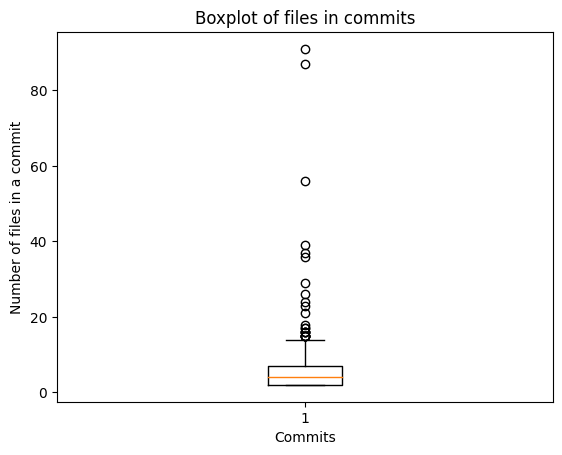

[91, 16, 37, 18, 15, 24, 23, 15, 17, 39, 29, 15, 16, 56, 17, 15, 26, 21, 16, 16, 87, 15, 15, 36]
Percentage of outliers: 0.36101083032490977
Number of outliers greater than 15: 18
Percentage of outliers greater than 15: 6.4981949458483745


" # Create a list to store the filtered rows\nfiltered_rows = []\n\nwith open(ProjectClone + '/_90_train_Of_Commits.csv', newline='') as csvfile:\n    reader = csv.reader(csvfile)\n\n    for row in reader:\n        # Check if the number of non-empty columns is not in the list of columns to remove\n        if sum(cell != '' for cell in row) not in Outliers:\n            filtered_rows.append(row)\n          \n\n# Write the filtered rows into a new CSV file\nwith open(ProjectClone + '/_90_train_Of_Commits_filtered.csv', 'w', newline='') as csvfile:\n    writer = csv.writer(csvfile)\n    writer.writerows(filtered_rows) "

In [20]:
### distribution of files in commits
import csv
import matplotlib.pyplot as plt
import numpy as np


ProjectClone= '/Users/narjes/Documents/ETS/Contrib5-Recommendation/APPROACHES/MainApproach_GA/Experiment_6/Projects/'+project
print(ProjectClone)
nb_files=[]
non_null_counts = []

with open(ProjectClone+ '/All_IaC_commits.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    
    for row in reader:
        non_null_columns = sum(cell != '' for cell in row)
        non_null_counts.append(non_null_columns)
print(non_null_counts)


fig, ax = plt.subplots()

# Plot the boxplot
boxplot= ax.boxplot(non_null_counts)

outliers = [flier.get_ydata() for flier in boxplot['fliers']]

# Print the outliers
print("Outliers:", outliers)

# Set labels and title
ax.set_xlabel('Commits')
ax.set_ylabel('Number of files in a commit')
ax.set_title('Boxplot of files in commits')

# Display the plot
plt.show()





my_array = np.array(outliers)
nested_list= my_array.tolist()
Outliers = [item for sublist in nested_list for item in sublist]
print(Outliers)



# Compute the percentage of outliers
percentage_outliers = (len(outliers) / len(non_null_counts)) * 100
print("Percentage of outliers:", percentage_outliers)

import numpy as np
threshold = 15
# Flatten the nested list
flattened_outliers = np.concatenate(outliers).ravel()

# Filter the outliers based on the threshold
outliers_greater_than_10 = [value for value in flattened_outliers if value > threshold]

# Calculate the percentage of outliers
percentage_outliers_greater_than_10 = (len(outliers_greater_than_10) / len(non_null_counts)) * 100

# Print the results
print("Number of outliers greater than 15:", len(outliers_greater_than_10))
print("Percentage of outliers greater than 15:", percentage_outliers_greater_than_10)

save_info(project, "Percentage of outliers out of all data points:", percentage_outliers,Technical_info_file_name)   
save_info(project, "Percentage of outliers greater than 15 out of all outliers:", percentage_outliers_greater_than_10,Technical_info_file_name)

   



""" # Create a list to store the filtered rows
filtered_rows = []

with open(ProjectClone + '/_90_train_Of_Commits.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)

    for row in reader:
        # Check if the number of non-empty columns is not in the list of columns to remove
        if sum(cell != '' for cell in row) not in Outliers:
            filtered_rows.append(row)
          

# Write the filtered rows into a new CSV file
with open(ProjectClone + '/_90_train_Of_Commits_filtered.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(filtered_rows) """




In [21]:
filtered_rows = []

with open(ProjectClone + '/_90_train_Of_Commits_hash.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)

    for row in reader:
        # Check if the number of non-empty columns is not in the list of columns to remove
        if sum(cell != '' for cell in row) < 10:
            filtered_rows.append(row)
          

# Write the filtered rows into a new CSV file
with open(ProjectClone + '/_90_train_Of_Commits_filtered.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(filtered_rows) 


filtered_rows = []

with open(ProjectClone + '/_10_test_Of_Commits_hash.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)

    for row in reader:
        # Check if the number of non-empty columns is not in the list of columns to remove
        if sum(cell != '' for cell in row) < 16:
            filtered_rows.append(row)
          

# Write the filtered rows into a new CSV file
with open(ProjectClone + '/_10_test_Of_Commits_filtered.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(filtered_rows)  

In [42]:
import csv
import statistics
import pandas as pd

non_null_counts = []
project= "control-repo"
Technical_info_file_name = f'/Users/narjes/Documents/ETS/Contrib5-Recommendation/APPROACHES/MainApproach_GA/Experiment_7/Technical_Info/{project}__Technical_Info.csv'

ProjectClone = '/Users/narjes/Documents/ETS/Contrib5-Recommendation/APPROACHES/MainApproach_GA/Experiment_7/Projects/'+project

with open(ProjectClone+ '/All_commits.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    
    for row in reader:
        if any("_(IaC)_" in cell for cell in row):
            continue  # Skip this row

        # Count non-empty cells in the row
        non_null_columns = sum(cell != '' for cell in row)
        if non_null_columns-1>0:
           non_null_counts.append(int(non_null_columns)-1)
        
print(non_null_counts)
average = sum(non_null_counts) / len(non_null_counts)
std_dev = statistics.stdev(non_null_counts)


print("Average number of files per commit:", average)
save_info(project, "Average number of files per commit in Non-IaC commits:", average,Technical_info_file_name)
print("Standard deviation of files per commit:", std_dev)
save_info(project, "Standard deviation of files per commit in Non-IaC commits:", std_dev,Technical_info_file_name)

[1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 19, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 45, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1]
Average number of files per commit: 1.5161290322580645
Standard deviation of files per commit: 3.517102318442814


In [20]:

import csv
import statistics
import pandas as pd


project= "control-repo"

ProjectClone = '/Users/narjes/Documents/ETS/Contrib5-Recommendation/APPROACHES/MainApproach_GA/Experiment_7/Projects/'+project

string_x_counts = []

with open(ProjectClone+ '/All_IaC_commits.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    
    for row in reader:
        count = sum('_(Other)_' in cell for cell in row)
        string_x_counts.append(count)
print(string_x_counts)
average = sum(string_x_counts) / len(string_x_counts)
std_dev = statistics.stdev(string_x_counts)

print("Average count of string other:", average)
print("Standard deviation of string other counts:", std_dev)

string_x_counts = []

with open(ProjectClone+ '/All_IaC_commits.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    
    for row in reader:
        count = sum('_(IaC)_' in cell for cell in row)
        string_x_counts.append(count)
print(string_x_counts)
average = sum(string_x_counts) / len(string_x_counts)
std_dev = statistics.stdev(string_x_counts)

print("Average count of string iac:", average)
print("Standard deviation of string iac:", std_dev)

[24, 17, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 9, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 7, 3, 0, 0, 8, 5, 4, 1, 2, 11, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 4, 0, 0, 0, 0, 6, 0, 10, 1, 8, 0, 2, 5, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 8, 0, 0, 2, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 3, 0, 1, 1, 0, 1, 0, 0, 3, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 3, 2, 0, 0, 0, 0, 10, 0, 10, 0, 11, 0, 0, 11, 0, 1, 0, 7, 1, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2]
Average count of string other: 1.1333333333333333
Standard deviation of string other counts: 2.909032002505481
[119, 17, 28, 9, 9, 2, 2, 1, 1, 1, 16, 5, 30, 9, 14, 2, 3, 1, 9, 1, 3, 1, 1, 2, 2, 1, 2, 2, 2, 3, 3, 1, 14, 3, 1,